<a href="https://colab.research.google.com/github/LawrenceELee/MachineLearning/blob/main/HFWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirements:

In [ ]:
! sudo apt install tesseract-ocr
! pip install transformers==4.35.2 diffusers==0.25.0 pytesseract==0.3.10 Pillow==9.4.0


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,539 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

A quick introduction to some basic Pyhton and showing them how this can be thought of as "AI"

In [ ]:
def contains_turtles(sentence):
    if 'turtles' in sentence.lower():
        return True
    else:
        return False
example_sentence = "I love watching turtles at the beach."
result = contains_turtles(example_sentence)



ML with a Logistic regression

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression

titanic = sns.load_dataset('titanic')[['fare', 'age', 'sex', 'pclass', 'survived']]
titanic.dropna(inplace = True)
X = titanic.drop('survived', axis = 1)
X["sex"] = (X["sex"] == "male").astype(int)
y = titanic['survived']
# Show off a DataFrame!
titanic


,fare,age,sex,pclass,survived
0,7.2500,22.0,male,3,0
1,71.2833,38.0,female,1,1
2,7.9250,26.0,female,3,1
3,53.1000,35.0,female,1,1
4,8.0500,35.0,male,3,0
...,...,...,...,...,...
885,29.1250,39.0,female,3,0
886,13.0000,27.0,male,2,0
887,30.0000,19.0,female,1,1
889,30.0000,26.0,male,1,1


In [ ]:
model = LogisticRegression()

model.fit(X, y)

coefficients = model.coef_[0]
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])
coeff_df.reset_index(inplace=True)
coeff_df.rename(columns={'index': 'Feature'}, inplace=True)
coeff_df


,Feature,Coefficient
0,fare,0.000816
1,age,-0.035800
2,sex,-2.407117
3,pclass,-1.220910


Transformers demonstrations!

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

sentiment_pipeline("These beats are sick")



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9997411370277405}]

In [ ]:
from transformers import pipeline

second_pipeline = pipeline("sentiment-analysis", model = "cardiffnlp/twitter-roberta-base-sentiment-latest")

print(second_pipeline("These beats are sick!"))



config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'label': 'positive', 'score': 0.7884202003479004}]


In [ ]:
BBC_text = """Seren Price, 5, to climb highest peak in north AfricaPublished7 August PA MediaImage caption, Seren has raised in excess of £7,000 for Birmingham Children's Hospital where she received care as a babyBy Caitlin ParrBBC NewsA five-year-old girl is aiming to reach new heights by climbing the highest point in north Africa.Seren Price became the youngest person to complete the UK's three peaks challenge in under 48 hours last year.If walking up the three highest points of Scotland, England and Wales was not enough, Seren and her dad Glyn Price, 44, now plan to climb Mount Toubkal in Morocco.She is currently a finalist in a fundraiser award.The little explorer cut her teeth on the Welsh three peaks aged just three.It covers 17 miles (27km), taking on Yr Wyddfa and Cadair Idris, both in Eryri, also known as Snowdon, and Pen y Fan in Bannau Brycheiniog, .or the Brecon Beacons Then last December and aged five, she and her father, a mountain leader, walked up Ben Nevis, Scafell Pike and Yr Wyddfa, also known as Snowdon.Image source, PA MediaImage caption, Seren and her father Glyn climbed Yr Wyddfa, Ben Nevis and Scafell Pike in less than 48 hours last winterSeren said her favourite parts of that 23-mile (37km) challenge was "the view" and "being with my dad".They next plan to take on Mount Toubkal, in Morocco's Atlas Mountains.When planning their challenge to climb the three highest peaks of Scotland, England and Wales, the Price family decided to use it as an opportunity to fundraise for a special cause. They wanted to give something back as Seren needed treatment at the Birmingham Children's Hospital as a premature newborn."They did remarkable wonders with her," said former firefighter Glyn, from Llangennech, Carmarthenshire."They're a brilliant hospital." 'Wrong mountain' climber to retake challengeMan carrying fridge finishes three-peaks challengeCharity climbers must prepare better, say rescuersSetting out to raise £100, the youngster instead received in excess of £7,000 as the pair persevered in severe winter weather conditions and temperatures as low as -18C (-0.4F) in December.Seren has been shortlisted in the JustGiving awards at London's Roundhouse on 25 September. She has already picked out a "princess gown" to wear to the ceremony and is looking forward the most to "the ball and the dancing" afterwards. Image source, PA MediaImage caption, Seren climbed the Welsh three peaks of Yr Wyddfa and Cadair Idris, both in Eryri, and Pen y Fan in Bannau Brycheiniog as a three-year-oldSeren - who says she wants to be both a doctor and rock star when she grows up - helped a fellow climber in need on Ben Nevis during her Three Peaks challenge. After spotting the female walker suffering from exhaustion, she alerted her father, saying "Daddy, we need to help". She and her father called in mountain rescuers and assisted as the hiker was taken to a location where it was safe for a helicopter to land."We gave her our last Lucozade and she followed our torch down," Seren recalled.Image source, Family PhotoImage caption, Seren now wants to climb Mount Toubkal in MoroccoGlyn is no stranger to adventure, having taken many groups on the National Three Peaks challenge. "We thought it would be a good experience for Seren and a good chance for her to raise money for her chosen charity," he said.Max Woosey, known as the Boy in the Tent, was crowned as last year's Young Fundraiser of the Year after camping outside every night for three years in memory of his neighbour to raise £750,000 for North Devon Hospice.CELEBRATING WELSH MUSIC: From the swinging sixties to Cool CymruLADY BIGFOOT: A lonely Bigfoot has fallen in love... Related TopicsWalesLlangennechMountaineeringChildrenFundraisingUplifting storiesMore on this storyMan carrying fridge finishes three-peaks challengePublished30 AprilCharity climbers must prepare better, say rescuersPublished24 August 2020'Wrong mountain' climber to retake challengePublished2 September 2022Adventurer completes Three Lakes, Three Peaks testPublished24 September 2021"""

summary_pipe = pipeline("summarization", model="facebook/bart-large-cnn")

summary_pipe(BBC_text)


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'summary_text': "Seren Price became youngest person to complete UK's three peaks challenge in under 48 hours last year. She and her father, a mountain leader, walked up Ben Nevis, Scafell Pike and Yr Wyddfa, also known as Snowdon. They next plan to take on Mount Toubkal, in Morocco's Atlas Mountains."}]

In [ ]:
QA = pipeline(
   "document-question-answering",
   model="impira/layoutlm-invoices",
)

QA("https://wagon-public-datasets.s3.amazonaws.com/data-science-images/lectures/Transformers/receipt.webp",
   "What shop was this food bought at?")




Some weights of the model checkpoint at impira/layoutlm-invoices were not used when initializing LayoutLMForQuestionAnswering: ['token_classifier_head.weight', 'token_classifier_head.bias']
- This IS expected if you are initializing LayoutLMForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.9947521090507507,
  'answer': 'Bryant Park BPK',
  'start': 3,
  'end': 5}]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/30 [00:00<?, ?it/s]

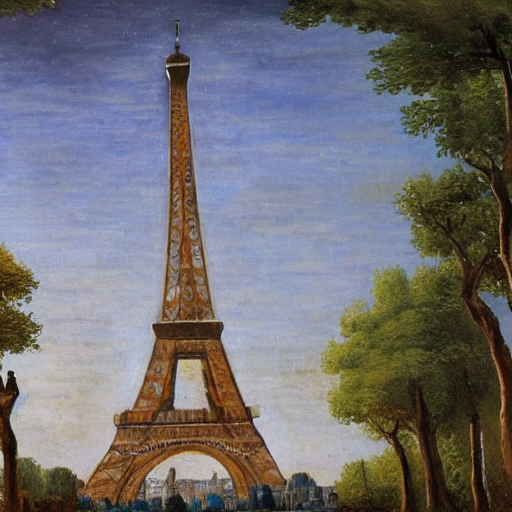

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch
pipeline = AutoPipelineForText2Image.from_pretrained(
   "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

prompt = "A Renaissance painting of the Eiffel tower"
pipeline(prompt, num_inference_steps=30).images[0]

